<p align="right">
    <img src="Zewail-City.png">
</p>


---

# __Qi-Wu-Zhang Model (QWZ)__

## _(2D Topological Insulator)_


The **Qi–Wu–Zhang (QWZ) model** is an essential minimal model for realizing a two-dimensional Chern insulator without external magnetic field **(Anomalous Quantum Hall Effect)** including a non-vanishing bulk Chern number. It can be regarded as the basic building block of the Bernevig–Hughes–Zhang (BHZ) model for the Quantum Spin Hall Effect, and is thus sometimes referred to as the “half BHZ” model.

## Dimensional Extension from a Thouless Pump

The QWZ model can be constructed by dimensional extension from a one-dimensional adiabatic pump — specifically, the Rice–Mele (RM) model with time-periodic driving. Starting from the bulk momentum-space Hamiltonian of the RM model,
$$
\hat{H}(k, t) = d_x(k, t)\,\sigma^x + d_y(k, t)\,\sigma^y + d_z(k, t)\,\sigma^z,
$$
the cyclic time variable $ t $ is promoted to an additional momentum coordinate $ k_y $. This procedure, known as **dimensional extension**, transforms a 1D time-periodic system into a 2D static system. The reverse operation is called **dimensional reduction**.


### Rice–Mele Thouless Pump

The Rice–Mele pump transports charge along a dimerized chain via modulation of sublattice potential and hopping amplitudes:
$$
\begin{aligned}
t_0(t) &= \sin(\Omega t), \\
t_1(t) &= t_1^{\; \mathrm{avg}} \cos(\Omega t), \\
t_2(t) &= 1.
\end{aligned}
$$
Here:
- $ t_0(t) $ modulates the staggered hopping asymmetry,
- $ t_1(t) $ controls the sublattice potential difference,
- $ t_2(t) $ is the average nearest-neighbor hopping amplitude.

The RM model Hamiltonian takes the form:
$$
\hat{H}_{\mathrm{RM}}(k, t) = t_2 \sin(k)\,\sigma^x 
+ t_0(t)\,\sigma^y 
+ \big[ t_1(t) + \cos(k) \big]\,\sigma^z.
$$


### From Thouless Pump to QWZ Model

By promoting the cyclic parameter $ t $ to a momentum coordinate $ k_y $ according to:
$$
\Omega t \ \longrightarrow \ k_y, \quad
k \ \longrightarrow \ k_x,
$$
the 1D RM model is transformed into the 2D QWZ model:
$$
\boxed{\hat{H}_{\mathrm{QWZ}}(k_x, k_y) =
t_2 \sin(k_x)\,\sigma^x 
+ t_0 \sin(k_y)\,\sigma^y
+ \big[ t_1 + \cos(k_x) + \cos(k_y) \big]\,\sigma^z.}
$$

The corresponding $ \mathbf{d}(\mathbf{k}) $ vector is given by:
$$
\mathbf{d}(k_x, k_y) =
\begin{pmatrix}
t_2 \sin k_x \\
t_1 \sin k_y \\
t_0 + \cos k_x + \cos k_y
\end{pmatrix}.
$$

## Bulk Dispersion Relation

Using the algebraic property of Pauli matrices,
$$
\hat{H}^2(\mathbf{k}) = E^2(\mathbf{k})\, I_2,
$$
where $ I_2 $ is the $ 2 \times 2 $ identity matrix, the spectrum of the QWZ model consists of two bands, corresponding to the two eigenvalues of $ \hat{H}(\mathbf{k}) $:
$$
E_{\pm}(k_x, k_y) = \pm \, \left| \mathbf{d}(k_x, k_y) \right|.
$$

Substituting the $ \mathbf{d} $-vector of the QWZ model,
$$
E_{\pm}(k_x, k_y) = \pm \sqrt{
 \sin^2 k_x
+ \sin^2 k_y
+ \left[ t_0 + \cos k_x + \cos k_y \right]^2
}.
$$


### Gap Closing Conditions

The spectrum is gapped except when $ \mathbf{d}(\mathbf{k}) = 0 $ at certain points in the Brillouin zone.  
From $ d_x = d_y = 0 $, we find that gap closing occurs only at four inequivalent high-symmetry points:

1. **$\Gamma$ point**: $ k_x = 0, \ k_y = 0 $  
   Gap closes when $ t_0 = -2 $.

2. **X points**: $ (k_x, k_y) = (0, \pi) $ and $ (\pi, 0) $  
   Gap closes when $ t_0 = 0 $.

3. **M point**: $ k_x = \pi, \ k_y = \pi $  
   Gap closes when $ t_0 = 2 $.


### Dirac Points and Cones

At these critical values of $ t_0 $, the dispersion near the gap closing points becomes linear, forming **Dirac cones**.  
For all other values $ t_0 \neq -2, 0, 2 $, the spectrum remains gapped, allowing the investigation of the **topological phases** of the system.


In [1]:
# Main Library
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import plotly.graph_objects as go
from IPython.display import Image
from mpl_toolkits.mplot3d import Axes3D
from sympy import matrix2numpy

%matplotlib widget

In [2]:
# Parameters
t0 = 2.0  # Mass term (controls topology)          
N = 100

def calculate_qwz_bands(t0=t0, N=N):
    """
    Calculate energy bands E±(kx, ky) for the Qi–Wu–Zhang model.

    Parameters:
    -----------
    N : int
        Grid resolution in each k-direction

    Returns:
    --------
    KX, KY : 2D numpy arrays of k-points
    E_plus, E_minus : 2D numpy arrays of energies
    """
    kx = np.linspace(-np.pi, np.pi, N)
    ky = np.linspace(-np.pi, np.pi, N)
    KX, KY = np.meshgrid(kx, ky)

    term1 = (np.sin(KX))**2
    term2 = (np.sin(KY))**2
    term3 = (t0 + np.cos(KX) + np.cos(KY))**2

    E_plus = np.sqrt(term1 + term2 + term3)
    E_minus = -E_plus
    t0 = t0
    return KX, KY, E_plus, E_minus, t0


def plot_qwz_bands(KX, KY, E_plus, E_minus):
    """
    Plot the 3D energy bands E±(kx, ky) for the Qi–Wu–Zhang model.
    """
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    ax.plot_surface(KX, KY, E_plus, cmap='plasma', alpha=0.8, linewidth=0, antialiased=True)
    ax.plot_surface(KX, KY, E_minus, cmap='viridis', alpha=0.8, linewidth=0, antialiased=True)

    ax.set_xlabel(r'$k_x$')
    ax.set_ylabel(r'$k_y$')
    ax.set_zlabel(r'$E(k_x, k_y)$')
    ax.set_title(fr'QWZ Model Bands, $t_0={t0}$')

    ax.set_zlim(-3.5, 3.5)
    ax.view_init(elev=20, azim=30)
    plt.tight_layout()
    plt.show()


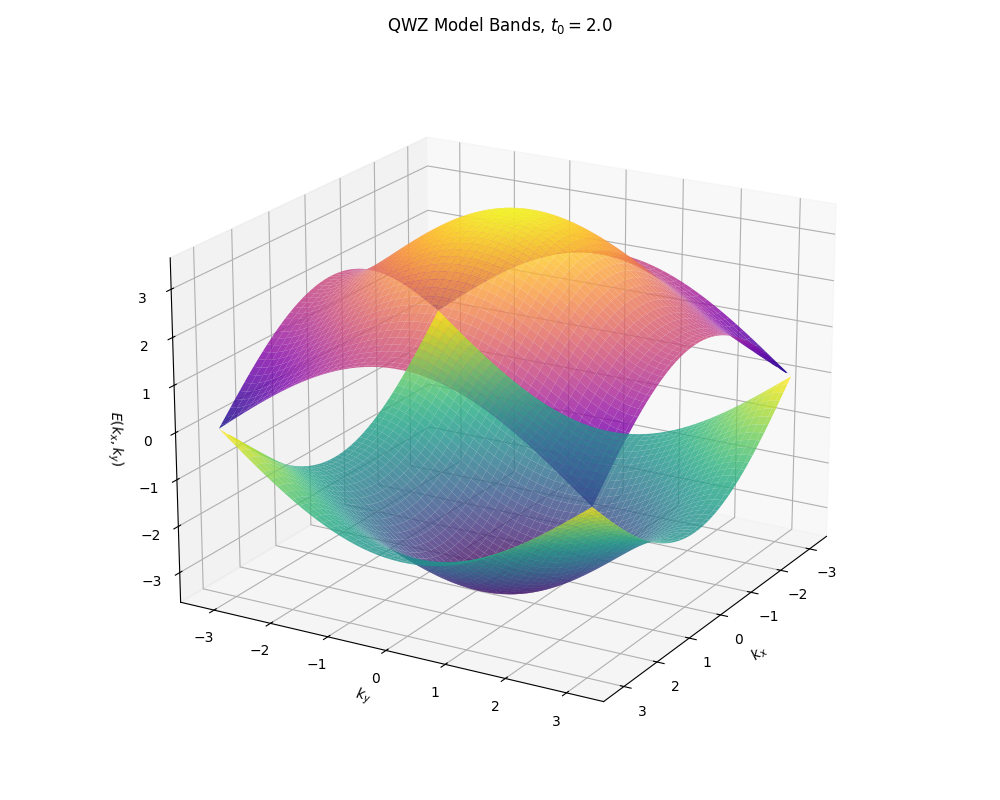

In [3]:
# Plotting 
KX, KY, E_plus, E_minus,t0 = calculate_qwz_bands(t0=t0)
plot_qwz_bands(KX, KY, E_plus, E_minus)

In [4]:
def plot_qwz_bands(t0, N=100):
    """
    Plot E+ and E- bands for the QWZ model side-by-side.
    """
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    extent = [-np.pi, np.pi, -np.pi, np.pi]

    # Plot E+
    im0 = axes[0].imshow(E_plus.T, origin='lower', extent=extent,
                         cmap='plasma', aspect='equal')
    axes[0].set_title(r"$E_+(k_x, k_y)$")
    axes[0].set_xlabel(r"$k_x$")
    axes[0].set_ylabel(r"$k_y$")
    fig.colorbar(im0, ax=axes[0], label="Energy")

    # Plot E-
    im1 = axes[1].imshow(E_minus.T, origin='lower', extent=extent,
                         cmap='viridis', aspect='equal')
    axes[1].set_title(r"$E_-(k_x, k_y)$")
    axes[1].set_xlabel(r"$k_x$")
    axes[1].set_ylabel(r"$k_y$")
    fig.colorbar(im1, ax=axes[1], label="Energy")

    fig.suptitle(f"QWZ Bands for t0 = {t0}", fontsize=14)
    plt.tight_layout()
    plt.show()

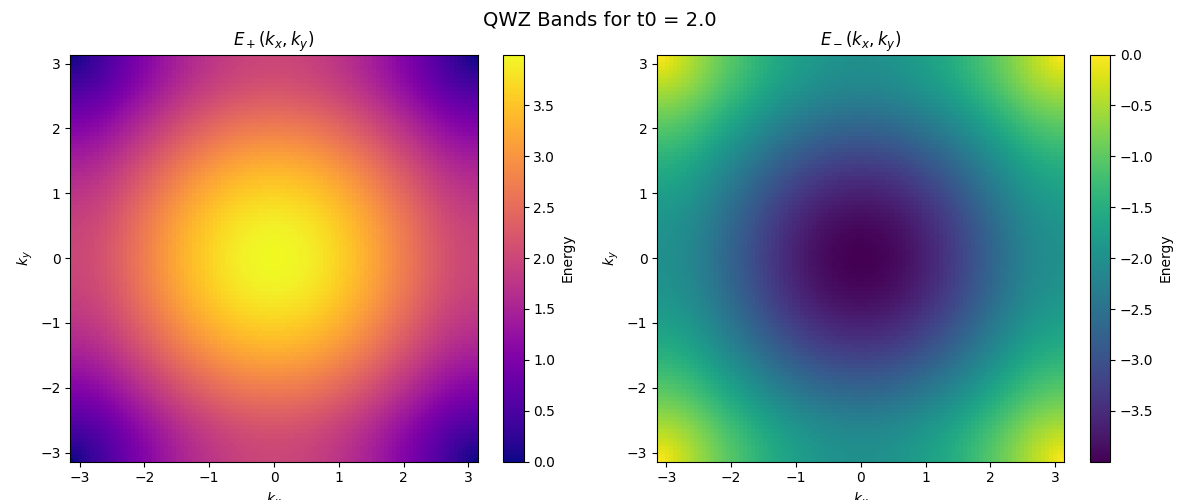

In [5]:
# Plot
plot_qwz_bands(t0=t0)

In [6]:
# Calculate E± for QWZ model
def qwz_eigenvalues(kx, ky, t0=t0):
    dx = np.sin(kx)
    dy = np.sin(ky)
    dz = t0 + np.cos(kx) + np.cos(ky)
    E = np.sqrt(dx**2 + dy**2 + dz**2)
    return np.array([+E, -E])

In [7]:
# Build k-path: Γ→X→M→Γ
path = []
labels = [r'$\Gamma$', r'$X$', r'$M$', r'$\Gamma$']
label_positions = [0]

# Γ→X
kx = np.linspace(0, np.pi, N)
ky = np.zeros(N)
path.append(np.column_stack((kx, ky)))
label_positions.append(len(np.vstack(path)))

# X→M
kx = np.pi * np.ones(N)
ky = np.linspace(0, np.pi, N)
path.append(np.column_stack((kx, ky)))
label_positions.append(len(np.vstack(path)))

# M→Γ
kx = np.linspace(np.pi, 0, N)
ky = np.linspace(np.pi, 0, N)
path.append(np.column_stack((kx, ky)))
label_positions.append(len(np.vstack(path)))

# Concatenate full path
k_path = np.vstack(path)

# Compute bands
bands = np.array([qwz_eigenvalues(kx, ky, t0) for kx, ky in k_path])

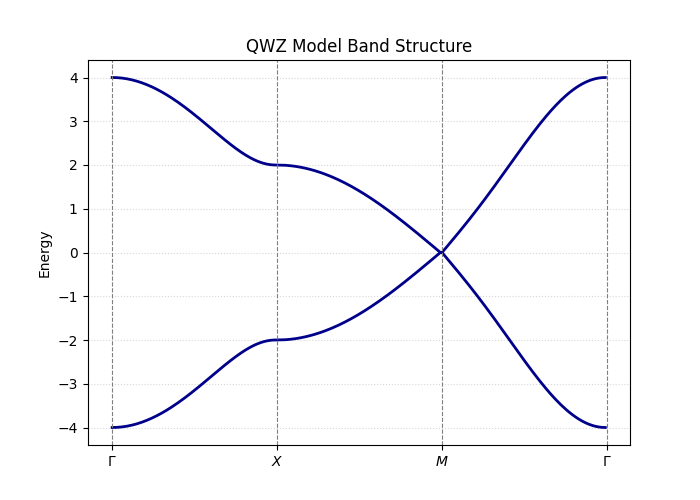

In [8]:
# Plot
plt.figure(figsize=(7, 5))
for band in bands.T:
    plt.plot(band, color='darkblue', lw=2)

# High symmetry labels
for pos in label_positions:
    plt.axvline(pos, color='gray', lw=0.8, ls='--')

plt.xticks(label_positions, labels)
plt.ylabel('Energy')
plt.title('QWZ Model Band Structure')
plt.grid(True, linestyle=':', alpha=0.5)
plt.show()

## Chern Number of the QWZ Model

The parameter $ t_0 $ controls the shift of the entire $\mathbf{d}(\mathbf{k})$-vector (torus in $\mathbf{d}$-space) along the $d_z$ direction.  
By tuning $ t_0 $, we determine whether the origin $(0,0,0)$ lies inside or outside this torus.

Three distinct cases occur:

1. **Origin outside the torus** — The Chern number is $Q  = 0$ .  
   This happens when $ |t_0| > 2 $.

2. **Origin inside the torus** — The Chern number is $ Q = -1 $.  
   This occurs when $ -2 < t_0 < 0 $.

3. **Origin inside the torus** — The Chern number is $ Q = +1 $.  
   This occurs when $ 0 < t_0 < 2 $.

$$
C =
\begin{cases}
0, & t_0 < -2, \\
-1, & -2 < t_0 < 0, \\
+1, & 0 < t_0 < 2, \\
0, & t_0 > 2.
\end{cases}
$$


In [9]:
# Define t0 range
t0 = np.linspace(-4, 4, 500)

# Define Chern number piecewise
C = np.piecewise(t0,
                 [t0 < -2, 
                  (t0 >= -2) & (t0 < 0), 
                  (t0 >= 0) & (t0 < 2), 
                  t0 >= 2],
                 [0, -1, 1, 0])

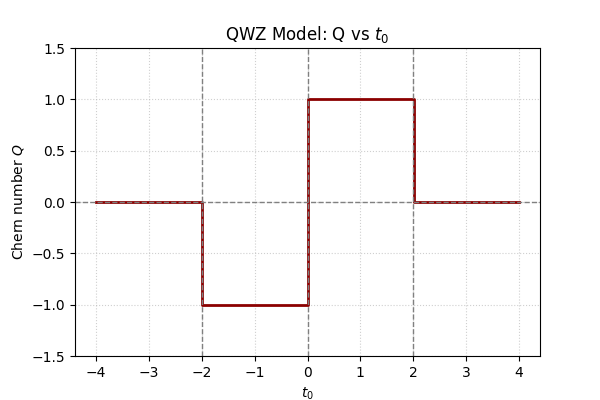

In [10]:
# Plot
plt.figure(figsize=(6,4))
plt.plot(t0, C, drawstyle='steps-post', lw=2, color='darkred')
plt.axhline(0, color='gray', lw=1, ls='--')
plt.axvline(-2, color='gray', lw=1, ls='--')
plt.axvline(0, color='gray', lw=1, ls='--')
plt.axvline(2, color='gray', lw=1, ls='--')

plt.xlabel(r'$t_0$')
plt.ylabel(r'Chern number $Q$')
plt.title('QWZ Model: Q vs $t_0$')
plt.ylim(-1.5, 1.5)
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

## Real-Space Hamiltonian of the QWZ Model

The Qi–Wu–Zhang model can be written in **real space** by inverse Fourier transformation of the bulk momentum-space Hamiltonian:
$$\boxed{
\hat{H} = 
\sum_{n_x=1}^{N_x-1} \sum_{n_y=1}^{N_y}
\left[
\frac{\sigma^z + i \sigma^x}{2} \, |n_x+1, n_y\rangle \langle n_x, n_y| + \text{h.c.}
\right]
+ \sum_{n_x=1}^{N_x} \sum_{n_y=1}^{N_y-1}
\left[
\frac{\sigma^z + i \sigma^y}{2} \, |n_x, n_y+1\rangle \langle n_x, n_y| + \text{h.c.}
\right]
+ t_0 \sum_{n_x=1}^{N_x} \sum_{n_y=1}^{N_y}
|n_x, n_y\rangle \sigma^z \langle n_x, n_y|.}
$$
Here:
- $t_2$ is the hopping amplitude along $x$ (appearing in the $\sigma^x$ term),
- $t_1$ is the hopping amplitude along $y$ (appearing in the $\sigma^y$ term),
- $t_0$ is the on-site mass (staggered onsite potential) term (in $\sigma^z$).



In [11]:
# Parameters
Nx, Ny = 3, 3   # small size example
t0 = sp.symbols('t0', real=True)

# Pauli matrices
sigma_x = sp.Matrix([[0, 1], [1, 0]])
sigma_y = sp.Matrix([[0, -sp.I], [sp.I, 0]])
sigma_z = sp.Matrix([[1, 0], [0, -1]])
I2 = sp.eye(2)

In [12]:
# Map (nx, ny) → site index
def site_index(nx, ny):
    return (ny * Nx + nx)  # 0-based index

# Total Hamiltonian size = Nx * Ny sites × spin-½ → 2*Nx*Ny
dim = 2 * Nx * Ny
H = sp.zeros(dim)

# add hopping term between sites a and b with matrix M
def add_hopping(H, a, b, M):
    H[a*2:(a+1)*2, b*2:(b+1)*2] += M
    H[b*2:(b+1)*2, a*2:(a+1)*2] += M.H  # Hermitian conjugate

In [13]:
# Hopping along x-direction
Mx = (sigma_z + sp.I * sigma_x) / 2
for nx in range(Nx - 1):
    for ny in range(Ny):
        a = site_index(nx, ny)
        b = site_index(nx + 1, ny)
        add_hopping(H, a, b, Mx)

# Hopping along y-direction
My = (sigma_z + sp.I * sigma_y) / 2
for nx in range(Nx):
    for ny in range(Ny - 1):
        a = site_index(nx, ny)
        b = site_index(nx, ny + 1)
        add_hopping(H, a, b, My)

# Onsite term
for nx in range(Nx):
    for ny in range(Ny):
        a = site_index(nx, ny)
        H[a*2:(a+1)*2, a*2:(a+1)*2] += t0 * sigma_z

In [14]:
# Display the Hamiltonian
H

Matrix([
[  t0,    0,  1/2,  I/2,   0,    0,  1/2,  1/2,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
[   0,  -t0,  I/2, -1/2,   0,    0, -1/2, -1/2,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
[ 1/2, -I/2,   t0,    0, 1/2,  I/2,    0,    0,  1/2,  1/2,    0,    0,    0,    0,    0,    0,    0,    0],
[-I/2, -1/2,    0,  -t0, I/2, -1/2,    0,    0, -1/2, -1/2,    0,    0,    0,    0,    0,    0,    0,    0],
[   0,    0,  1/2, -I/2,  t0,    0,    0,    0,    0,    0,  1/2,  1/2,    0,    0,    0,    0,    0,    0],
[   0,    0, -I/2, -1/2,   0,  -t0,    0,    0,    0,    0, -1/2, -1/2,    0,    0,    0,    0,    0,    0],
[ 1/2, -1/2,    0,    0,   0,    0,   t0,    0,  1/2,  I/2,    0,    0,  1/2,  1/2,    0,    0,    0,    0],
[ 1/2, -1/2,    0,    0,   0,    0,    0,  -t0,  I/2, -1/2,    0,    0, -1/2, -1/2,    0,    0,    0,    0],
[   0,    0,  1/2, -1/2,   0,    0,  1/2, -I/2,   t0,    0,  1/2,  I/2,    0,    0,  1/2,  1/2,    0,    0],
[   0,    

In [15]:
# Substitute t0 convert to numpy array
t0_val = 2.0

# Substitute t0 and convert to numeric
H_num = np.array(H.subs(t0, t0_val).applyfunc(lambda x: complex(x.evalf())), dtype=complex)

# Diagonalize numerically (Hermitian)
eigenvalues, eigenvectors = np.linalg.eigh(H_num)

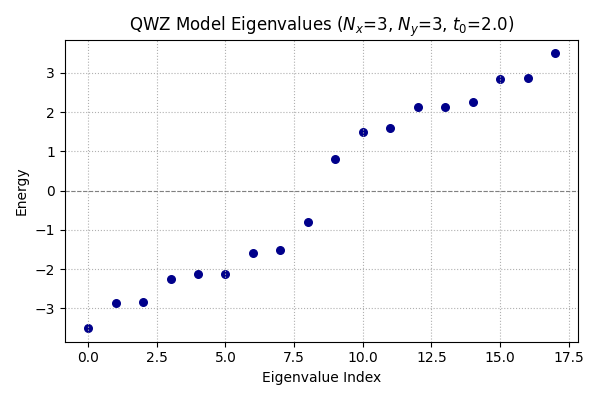

In [16]:
# Plot
plt.figure(figsize=(6, 4))
plt.scatter(range(len(eigenvalues)), eigenvalues, color='darkblue', s=30)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.xlabel('Eigenvalue Index')
plt.ylabel('Energy')
plt.title(f'QWZ Model Eigenvalues ($N_x$={Nx}, $N_y$={Ny}, $t_0$={t0_val})')
plt.grid(True, linestyle=':')
plt.tight_layout()
plt.show()

Text(0, 0.5, '$|\\psi|^2$')

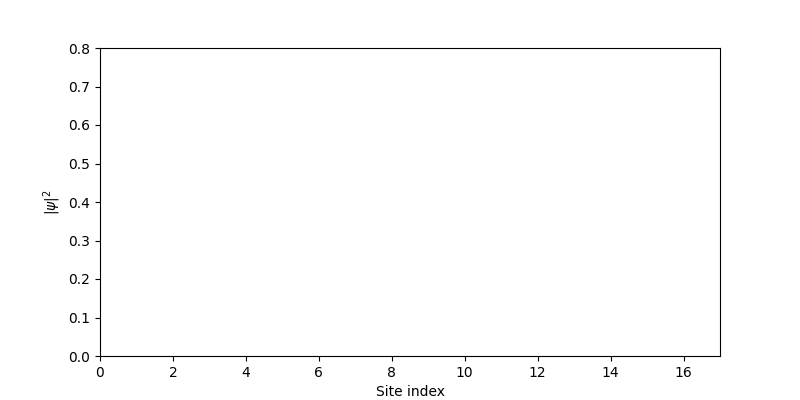

In [17]:
# Set up the plot
M = dim  
fig, ax = plt.subplots(figsize=(8, 4))
line, = ax.plot([], [], 'o-', color='darkblue')
title = ax.set_title("")
ax.set_xlim(0, M-1)
ax.set_ylim(0, 0.8)
ax.set_xlabel("Site index")
ax.set_ylabel(r'$|\psi|^2$')

In [18]:
# Initialization function
def init():
    line.set_data([], [])
    title.set_text("")
    return line, title

# Animation function
def animate(i):
    psi = eigenvectors[:, i]
    prob_density = np.abs(psi)**2
    line.set_data(np.arange(M), prob_density)
    title.set_text(f"Eigenstate {i+1}, Energy = {eigenvalues[i]:.3f}")
    return line, title

In [19]:
# Create animation
ani = FuncAnimation(fig, animate, frames=M, init_func=init,
                    blit=True, interval=300, repeat=False)

# Save animation as GIF
ani.save('Eigenvectors.gif', writer='pillow', fps=2)


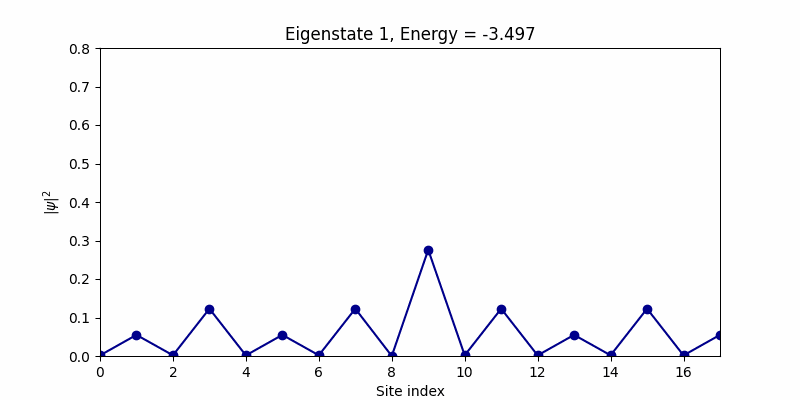

In [20]:
# Display GIF inline
Image(filename='Eigenvectors.gif')

## Edge States in the QWZ Model

To reveal the presence of edge states, consider a **strip geometry**:

- **Along $y$**: Periodic boundary conditions (forming a cylinder), with $N_y \to \infty$.  
- **Along $x$**: Open boundary conditions, with the strip terminated after $N_x$ sites.

Because translation invariance is preserved along $y$, a **partial Fourier transform** can be performed only along $y$, introducing a conserved momentum $k_y$.


### $ k_y $-Dependent Hamiltonian

After the partial Fourier transform, the QWZ Hamiltonian becomes:
$$
\hat{H}(k_y) =
\sum_{n_x=1}^{N_x-1}
\left[
\frac{\sigma^z + i\sigma^x}{2} \, |n_x+1\rangle \langle n_x| + \text{h.c.}
\right]
+ \sum_{n_x=1}^{N_x}
|n_x\rangle
\left[ \cos k_y \, \sigma^z + \sin k_y \, \sigma^y + t_0 \, \sigma^z \right]
\langle n_x|.
$$
Here $n_x$ labels the sites along $x$, and the spinor structure comes from the sublattice (Pauli matrices).


In [21]:
# Parameters
Nx = 4           # number of sites along x
t0, ky = sp.symbols('t0 ky')

# Total Hamiltonian size = Nx sites × 2 (sublattice)
dim = 2 * Nx
Hky = sp.zeros(dim)

# add hopping term between sites a and b with matrix M
def add_hopping(H, a, b, M):
    H[a*2:(a+1)*2, b*2:(b+1)*2] += M
    H[b*2:(b+1)*2, a*2:(a+1)*2] += M.H  # Hermitian conjugate

# Hopping along x-direction (open boundary)
Mx = (sigma_z + sp.I * sigma_x) / 2
for nx in range(Nx - 1):
    add_hopping(Hky, nx, nx+1, Mx)

# Onsite term including ky-dependence
for nx in range(Nx):
    Hky[nx*2:(nx+1)*2, nx*2:(nx+1)*2] += sp.cos(ky)*sigma_z + sp.sin(ky)*sigma_y + t0*sigma_z


In [22]:
# Display the Hamiltonian
Hky

Matrix([
[t0 + cos(ky),    -I*sin(ky),          1/2,           I/2,            0,             0,            0,             0],
[   I*sin(ky), -t0 - cos(ky),          I/2,          -1/2,            0,             0,            0,             0],
[         1/2,          -I/2, t0 + cos(ky),    -I*sin(ky),          1/2,           I/2,            0,             0],
[        -I/2,          -1/2,    I*sin(ky), -t0 - cos(ky),          I/2,          -1/2,            0,             0],
[           0,             0,          1/2,          -I/2, t0 + cos(ky),    -I*sin(ky),          1/2,           I/2],
[           0,             0,         -I/2,          -1/2,    I*sin(ky), -t0 - cos(ky),          I/2,          -1/2],
[           0,             0,            0,             0,          1/2,          -I/2, t0 + cos(ky),    -I*sin(ky)],
[           0,             0,            0,             0,         -I/2,          -1/2,    I*sin(ky), -t0 - cos(ky)]])

In [23]:
# Create a numerical function
Hky_func = sp.lambdify((t0, ky), Hky, modules='numpy')

# Evaluate for numerical values
t0_val = -1.5
ky_val = 0.5
Hky_num = Hky_func(t0_val, ky_val)  # returns a NumPy array

# Ensure dtype is complex
Hky_num = np.array(Hky_num, dtype=complex)

# Diagonalize numerically
eigenvalues, eigenvectors = np.linalg.eigh(Hky_num)

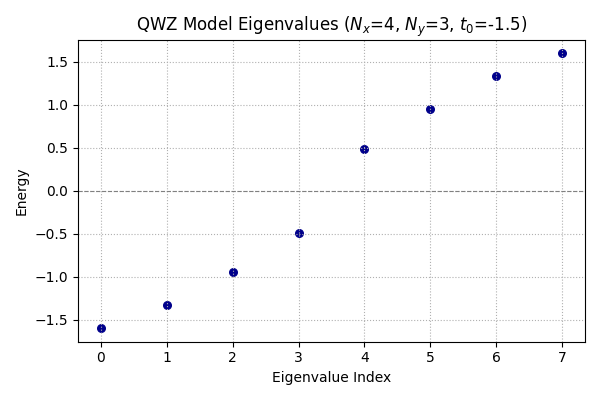

In [24]:
# Plot
plt.figure(figsize=(6, 4))
plt.scatter(range(len(eigenvalues)), eigenvalues, color='darkblue', s=30)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.xlabel('Eigenvalue Index')
plt.ylabel('Energy')
plt.title(f'QWZ Model Eigenvalues ($N_x$={Nx}, $N_y$={Ny}, $t_0$={t0_val})')
plt.grid(True, linestyle=':')
plt.tight_layout()
plt.show()

In [25]:
'''Changing to numpy rather sympy'''

#Parameters
Nx = 20         # number of sites along x
t0_val = -1.5    # mass term / onsite
n_ky = 400      # number of k_y points
t0_vals = np.arange(-2.5, 2.6, 0.1)  # t0 sweep

# Pauli matrices
sigma_x = np.array([[0, 1], [1, 0]], dtype=complex)
sigma_y = np.array([[0, -1j], [1j, 0]], dtype=complex)
sigma_z = np.array([[1, 0], [0, -1]], dtype=complex)

# Hamiltonian size
dim = 2 * Nx
energies = np.zeros((dim, n_ky))

# Helper function to add hopping
def add_hopping(H, a, b, M):
    H[a*2:(a+1)*2, b*2:(b+1)*2] += M
    H[b*2:(b+1)*2, a*2:(a+1)*2] += M.conj().T  # Hermitian conjugate

# k_y values
ky_vals = np.linspace(-np.pi, np.pi, n_ky)

In [26]:
# Loop over k_y and build Hky
for i, ky_val in enumerate(ky_vals):
    # Initialize Hamiltonian
    Hky = np.zeros((dim, dim), dtype=complex)

    # Hopping along x (open boundary)
    Mx = (sigma_z + 1j * sigma_x)/2
    for nx in range(Nx-1):
        add_hopping(Hky, nx, nx+1, Mx)

    # Onsite term including ky
    for nx in range(Nx):
        Hky[nx*2:(nx+1)*2, nx*2:(nx+1)*2] += t0_val*sigma_z + np.cos(ky_val)*sigma_z + np.sin(ky_val)*sigma_y

    # Diagonalize
    eigvals = np.linalg.eigh(Hky)[0]
    energies[:, i] = np.sort(eigvals)

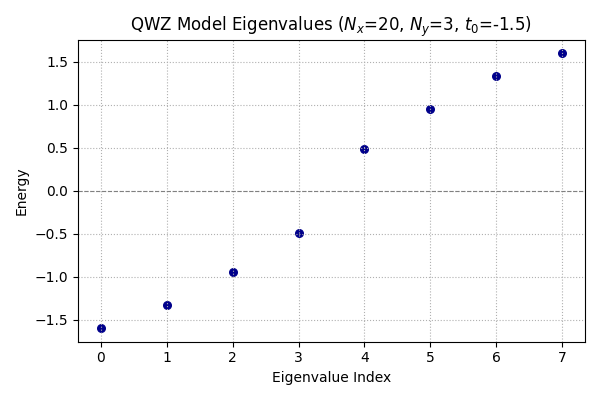

In [27]:
# Plot
plt.figure(figsize=(6, 4))
plt.scatter(range(len(eigenvalues)), eigenvalues, color='darkblue', s=30)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.xlabel('Eigenvalue Index')
plt.ylabel('Energy')
plt.title(f'QWZ Model Eigenvalues ($N_x$={Nx}, $N_y$={Ny}, $t_0$={t0_val})')
plt.grid(True, linestyle=':')
plt.tight_layout()
plt.show()

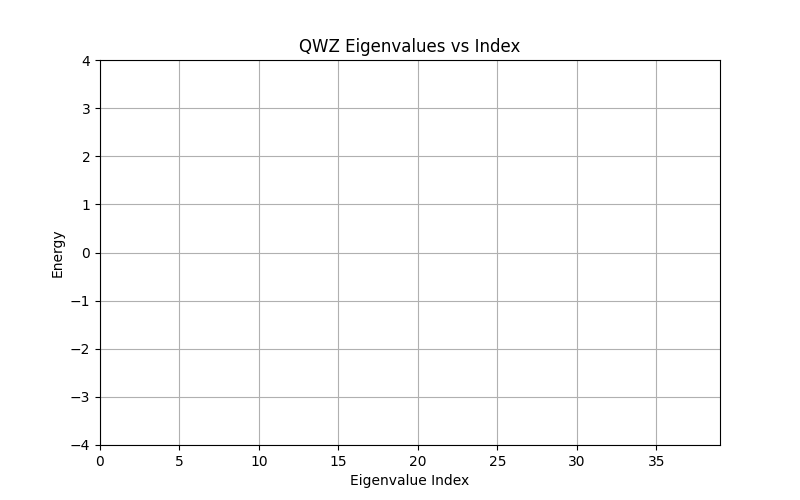

In [28]:
# Initialize figure
fig, ax = plt.subplots(figsize=(8,5))
line, = ax.plot([], [], 'o', color='darkblue')
ax.set_xlim(0, dim-1)
ax.set_ylim(-4, 4)
ax.set_xlabel("Eigenvalue Index")
ax.set_ylabel("Energy")
ax.set_title("QWZ Eigenvalues vs Index")
ax.grid(True)

In [29]:
# Animation function
def update(frame):
    t0_val = t0_vals[frame]
    Hky = np.zeros((dim, dim), dtype=complex)
    
    # Hopping along x
    Mx = (sigma_z + 1j*sigma_x)/2
    for nx in range(Nx-1):
        add_hopping(Hky, nx, nx+1, Mx)
    
    # Onsite term
    for nx in range(Nx):
        Hky[nx*2:(nx+1)*2, nx*2:(nx+1)*2] += t0_val*sigma_z + np.cos(ky_val)*sigma_z + np.sin(ky_val)*sigma_y
    
    # Diagonalize
    eigvals = np.linalg.eigh(Hky)[0]
    eigvals_sorted = np.sort(eigvals)
    
    # Update plot
    line.set_data(np.arange(dim), eigvals_sorted)
    ax.set_title(f"QWZ Eigenvalues vs Index (t_0 = {t0_val:.2f})")
    return line,


In [30]:
# Create animation
anim = FuncAnimation(fig, update, frames=len(t0_vals), interval=200, blit=True)

# save as GIF
anim.save("QWZ_eigenvalues.gif", writer='pillow')

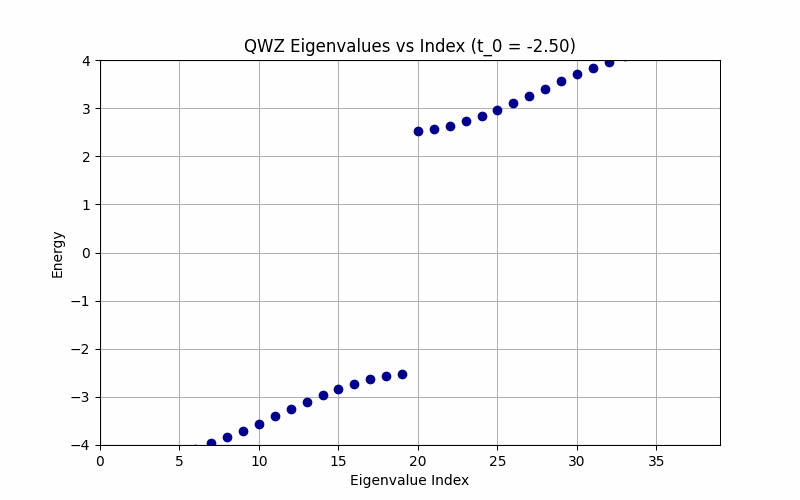

In [31]:
# Display GIF inline
Image(filename='QWZ_eigenvalues.gif')

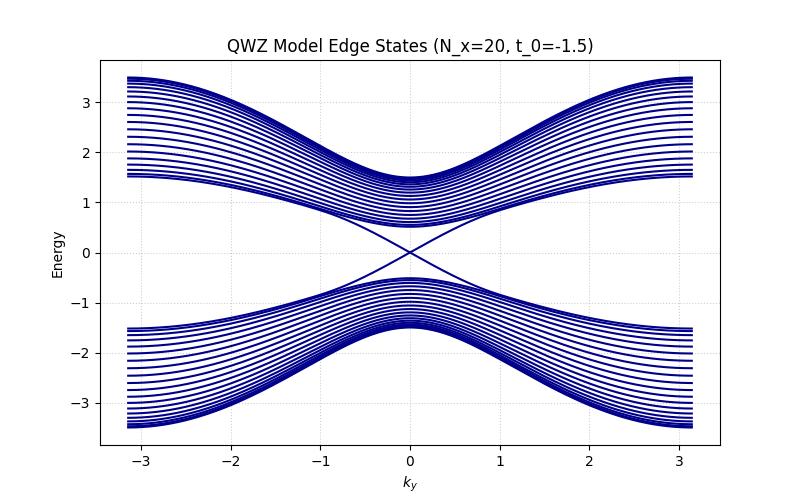

In [32]:
# Plot band structure
plt.figure(figsize=(8,5))
for band in range(dim):
    plt.plot(ky_vals, energies[band, :], color='darkblue')

plt.xlabel(r'$k_y$')
plt.ylabel('Energy')
plt.title(f'QWZ Model Edge States (N_x={Nx}, t_0={t0_val})')
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

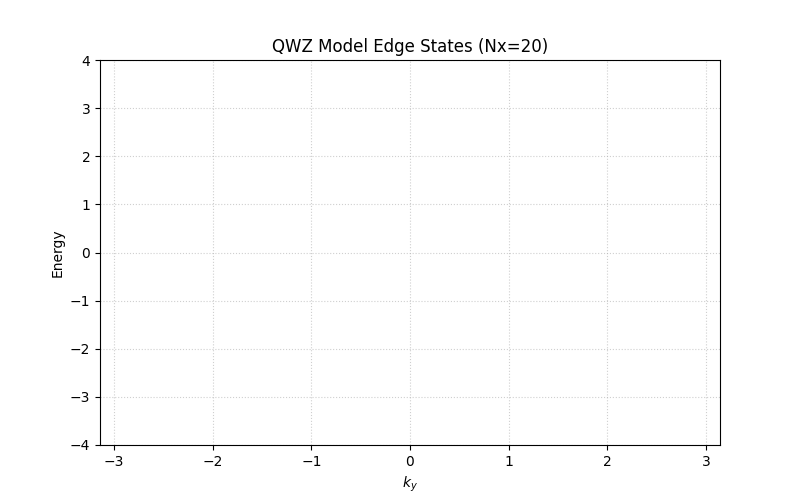

In [33]:
# Initialize figure
fig, ax = plt.subplots(figsize=(8,5))
lines = [ax.plot([], [], color='darkblue')[0] for _ in range(dim)]
ax.set_xlim(-np.pi, np.pi)
ax.set_ylim(-4, 4)
ax.set_xlabel(r'$k_y$')
ax.set_ylabel('Energy')
ax.set_title(f'QWZ Model Edge States (Nx={Nx})')
ax.grid(True, linestyle=':', alpha=0.6)

# Animation function
def update(frame):
    t0_val = t0_vals[frame]
    energies = np.zeros((dim, n_ky))
    
    for i, ky in enumerate(ky_vals):
        Hky = np.zeros((dim, dim), dtype=complex)
        
        # Hopping along x
        Mx = (sigma_z + 1j*sigma_x)/2
        for nx in range(Nx-1):
            add_hopping(Hky, nx, nx+1, Mx)
        
        # Onsite term including ky
        for nx in range(Nx):
            Hky[nx*2:(nx+1)*2, nx*2:(nx+1)*2] += t0_val*sigma_z + np.cos(ky)*sigma_z + np.sin(ky)*sigma_y
        
        # Diagonalize
        eigvals = np.linalg.eigh(Hky)[0]
        energies[:, i] = np.sort(eigvals)
    
    # Update all lines
    for band in range(dim):
        lines[band].set_data(ky_vals, energies[band, :])
    
    ax.set_title(f'QWZ Model Edge States (N_x={Nx}, t_0={t0_val:.2f})')
    return lines

In [34]:
# Create animation
anim = FuncAnimation(fig, update, frames=len(t0_vals), interval=200, blit=False)

# save as GIF
anim.save("QWZ_bandstructure.gif", writer='pillow')

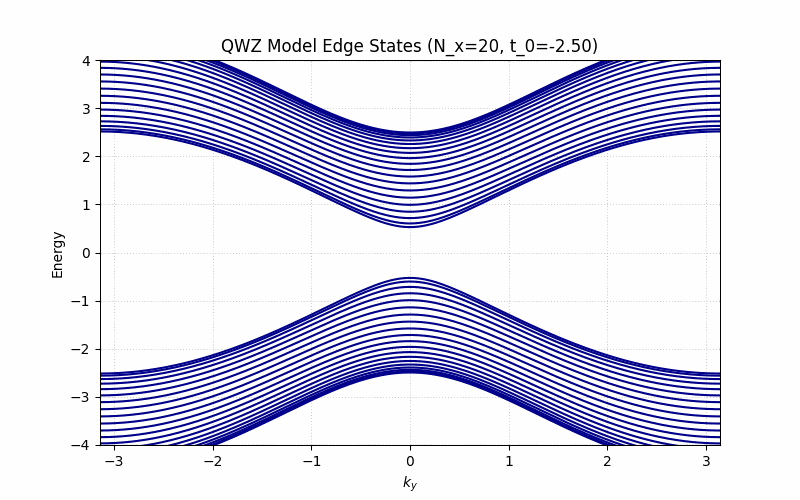

In [35]:
# Display GIF inline
Image(filename='QWZ_bandstructure.gif')

### Bulk vs. Edge States

- **Bulk states**: Delocalized along both $x$ and $y$.  
- **Edge states**: Delocalized along $y$ but exponentially localized near $x=1$ (left edge) or $x=N_x$ (right edge).

States with energies lying deep inside the bulk gap must be edge states.  
The **group velocity** along $y$ is given by:
$$
v_g = \frac{\partial E}{\partial k_y}.
$$
- Left-edge states: Propagate **upwards** ($v_g > 0$).  
- Right-edge states: Propagate **downwards** ($v_g < 0$).


#### Physical Implication

Although the bulk of the QWZ model remains insulating at low energies, the presence of **one-way propagating edge states** makes the system conductive along the edges — a hallmark of the quantum Hall phase.

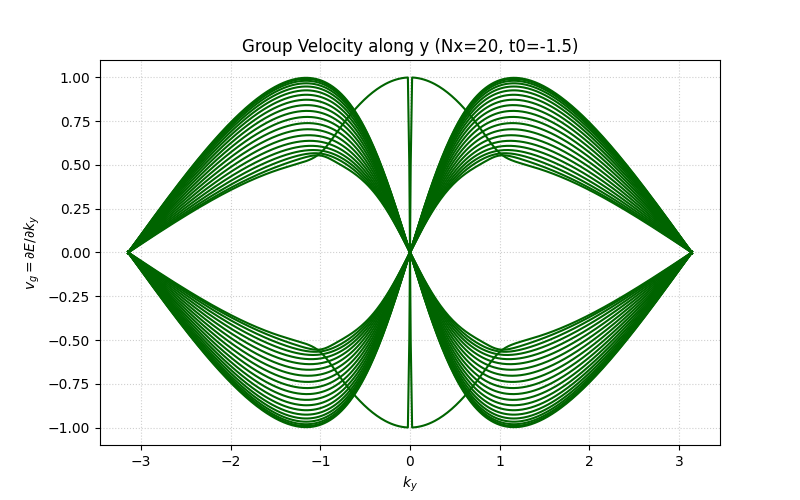

In [36]:
# Compute numerical derivative along ky (axis=1)
vg = np.gradient(energies, ky_vals, axis=1)  # units of energy per unit k_y

# Plot group velocity for each band
plt.figure(figsize=(8,5))
for band in range(dim):
    plt.plot(ky_vals, vg[band, :], color='darkgreen')

plt.xlabel(r'$k_y$')
plt.ylabel(r'$v_g = \partial E / \partial k_y$')
plt.title(f'Group Velocity along y (Nx={Nx}, t0={t0_val})')
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

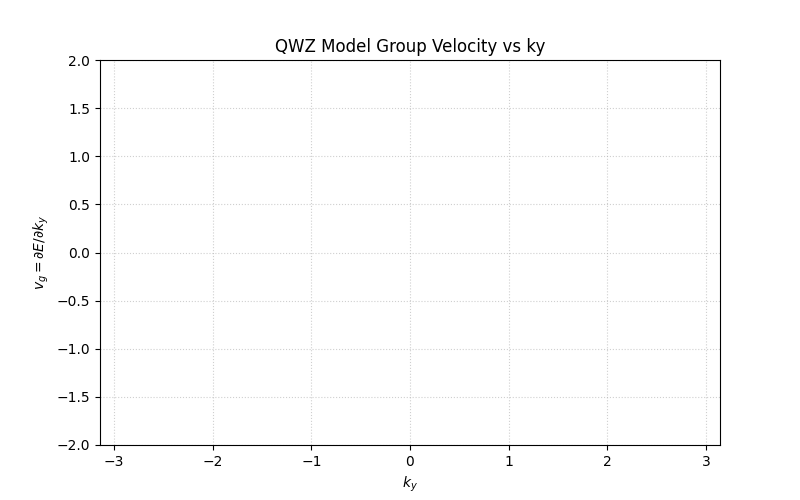

In [37]:
# Initialize figure
fig, ax = plt.subplots(figsize=(8,5))
lines = [ax.plot([], [], color='darkgreen')[0] for _ in range(dim)]
ax.set_xlim(-np.pi, np.pi)
ax.set_ylim(-2, 2)
ax.set_xlabel(r'$k_y$')
ax.set_ylabel(r'$v_g = \partial E / \partial k_y$')
ax.set_title("QWZ Model Group Velocity vs ky")
ax.grid(True, linestyle=':', alpha=0.6)

In [38]:
# Animation function
def init():
    for line in lines:
        line.set_data([], [])
    return lines

def update(frame):
    t0_val = t0_vals[frame]
    vg_all = np.zeros((dim, n_ky))

    for i, ky in enumerate(ky_vals):
        # Build Hky for given ky
        H = np.zeros((dim, dim), dtype=complex)
        for nx in range(Nx-1):
            add_hopping(H, nx, nx+1, Mx)
        for nx in range(Nx):
            H[nx*2:(nx+1)*2, nx*2:(nx+1)*2] += np.cos(ky)*sigma_z + np.sin(ky)*sigma_y + t0_val*sigma_z

        eigvals = np.sort(np.linalg.eigh(H)[0])
        vg_all[:, i] = eigvals  # temporarily store E

    # Compute finite-difference derivative along ky
    vg_all = np.gradient(vg_all, ky_vals, axis=1)

    for i, line in enumerate(lines):
        line.set_data(ky_vals, vg_all[i, :])
    ax.set_title(f"QWZ Group Velocity (t_0={t0_val:.2f})")
    return lines

In [39]:
# Create animation
anim = FuncAnimation(fig, update, frames=len(t0_vals), init_func=init, blit=False, interval=200)

#save as GIF
anim.save("QWZ_group_velocity.gif", writer='pillow')

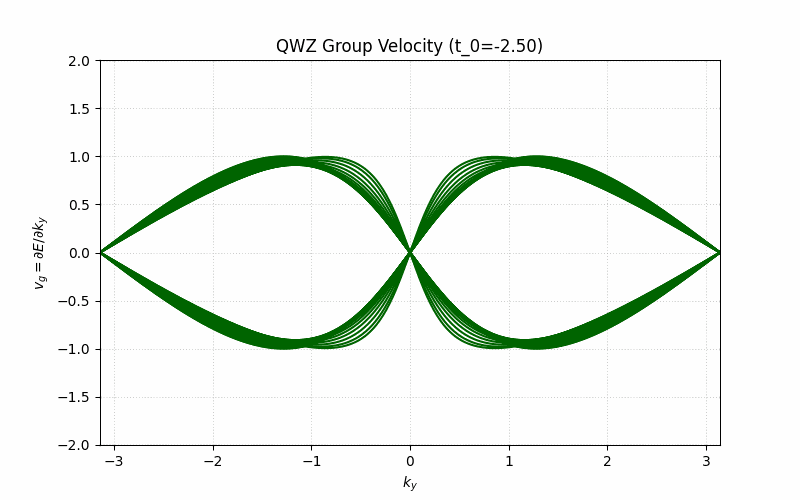

In [40]:
# Display GIF inline
Image(filename='QWZ_group_velocity.gif')

### Edge Perturbations

If the Hamiltonian is modified **only near the edges** (translation-invariant along $y$), the edge-state dispersion can be deformed, but the **topological invariant remains unchanged**.

Example perturbations:
- Additional **state-independent next-nearest-neighbor hopping** along $y$.
- Onsite potential shifts at $n_x = 1$ (left edge) or $n_x = N_x$ (right edge).

Including such terms, the $k_y$-dependent Hamiltonian becomes:
$$
\hat{H}(k_y) \to \hat{H}(k_y) +
\sum_{n_x \in \{1,N\}} |n_x\rangle \langle n_x| \otimes \hat{I}_2 \left( \mu^{(n_x)} + h_2^{(n_x)} \cos 2k_y \right)
$$

These perturbations can:
- Shift edge-state energies.
- Warp their dispersion.
- Add pairs of counter-propagating edge states (leaving the total Chern number unchanged).


In [41]:
# Parameters
Nx = 4           # number of sites along x
# Define symbols
t0, ky = sp.symbols('t0 ky')
mu1, muN = sp.symbols('mu^1 mu^N')  
h2_1, h2_N = sp.symbols('h_2^1 h_2^N')  
dim = 2 * Nx
Hp = sp.zeros(dim)

sigma_x = sp.Matrix([[0, 1], [1, 0]])
sigma_y = sp.Matrix([[0, -sp.I], [sp.I, 0]])
sigma_z = sp.Matrix([[1, 0], [0, -1]])
sigma_I = sp.eye(2)

# Helper function to add hopping between sites
def add_hopping(H, site_i, site_j, matrix):
    """Add hopping from site i to site j with 2x2 matrix"""
    start_i, end_i = 2*site_i, 2*(site_i + 1)
    start_j, end_j = 2*site_j, 2*(site_j + 1)
    H[start_i:end_i, start_j:end_j] += matrix
    H[start_j:end_j, start_i:end_i] += matrix.H  # Hermitian conjugate

In [42]:
# X-direction hopping (nearest neighbor)
# Hopping: (σ^z + i σ^x)/2 between |n_x+1⟩⟨n_x|
Mx = (sigma_z + sp.I * sigma_x) / 2
for nx in range(Nx - 1):
    add_hopping(Hp, nx, nx + 1, Mx)

# On-site term (depends on ky)
# Each site has: cos(ky)*σ^z + sin(ky)*σ^y + t0*σ^z
onsite_base = sp.cos(ky) * sigma_z + sp.sin(ky) * sigma_y + t0 * sigma_z

for nx in range(Nx):
    start = 2 * nx
    end = 2 * (nx + 1)
    Hp[start:end, start:end] += onsite_base

# Add boundary potential at edges (n_x = 0 and n_x = Nx-1)
# Term: |n_x⟩⟨n_x| ⊗ I * (μ^(n_x) + h2^(n_x) * cos(2ky))
boundary_term_0 = (mu1 + h2_1 * sp.cos(2*ky)) * sigma_I
boundary_term_N = (muN + h2_N * sp.cos(2*ky)) * sigma_I

# Apply to first site (n_x = 0)
Hp[0:2, 0:2] += boundary_term_0

# Apply to last site (n_x = Nx-1)
last = Nx - 1
Hp[2*last:2*(last+1), 2*last:2*(last+1)] += boundary_term_N

In [43]:
# Display the Hamiltonian
Hp

Matrix([
[h_2^1*cos(2*ky) + mu^1 + t0 + cos(ky),                            -I*sin(ky),          1/2,           I/2,            0,             0,                                     0,                                     0],
[                            I*sin(ky), h_2^1*cos(2*ky) + mu^1 - t0 - cos(ky),          I/2,          -1/2,            0,             0,                                     0,                                     0],
[                                  1/2,                                  -I/2, t0 + cos(ky),    -I*sin(ky),          1/2,           I/2,                                     0,                                     0],
[                                 -I/2,                                  -1/2,    I*sin(ky), -t0 - cos(ky),          I/2,          -1/2,                                     0,                                     0],
[                                    0,                                     0,          1/2,          -I/2, t0 + cos(ky),    -I

In [44]:
# Lambdify for fast numerical evaluation
H_func = sp.lambdify((t0, ky, mu1, muN, h2_1, h2_N), Hp, 'numpy')

# Set parameters
t0_val = 1.0
ky_val = 0.5
mu1_val = 0.5
muN_val = 0.5
h2_1_val = 1
h2_N_val = 2

# Evaluate
H_num = H_func(t0_val, ky_val, mu1_val, muN_val, h2_1_val, h2_N_val)

# Diagonalize
eigenvalues, eigenvectors = np.linalg.eigh(H_num)


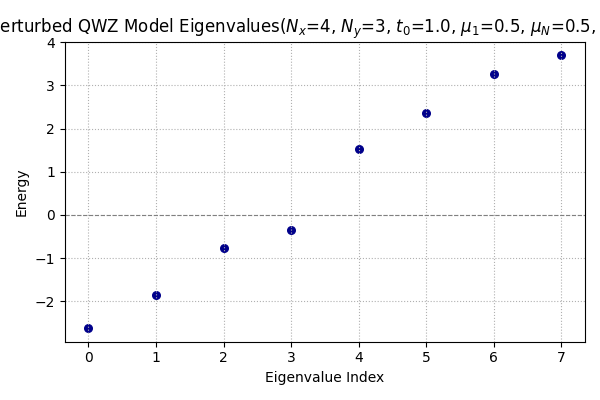

In [45]:
# Plot
plt.figure(figsize=(6, 4))
plt.scatter(range(len(eigenvalues)), eigenvalues, color='darkblue', s=30)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.xlabel('Eigenvalue Index')
plt.ylabel('Energy')
plt.title(rf'Edge-Perturbed QWZ Model Eigenvalues'
          rf'($N_x$={Nx}, $N_y$={Ny}, $t_0$={t0_val}, '
          rf'$\mu_1$={mu1_val}, $\mu_N$={muN_val}, '
          rf'$h_2^1$={h2_1_val}, $h_2^N$={h2_N_val})')
plt.grid(True, linestyle=':')
plt.tight_layout()
plt.show()

In [46]:
'''Changing to numpy rather sympy'''
def add_hopping(H, site_i, site_j, matrix):
    """
    Add hopping (2x2 block) between site_i and site_j in the block Hamiltonian H.
    H is modified in place. Sites are 0-based.
    """
    si, ei = 2*site_i, 2*(site_i+1)
    sj, ej = 2*site_j, 2*(site_j+1)
    H[si:ei, sj:ej] += matrix
    H[sj:ej, si:ei] += matrix.H  # Hermitian conjugate

# numeric Hamiltonian
def build_Hp(Nx=400, t0=2, ky=0.5, mu1=0.0, muN=0.0, h2_1=0.0, h2_N=0.0):
    dim = 2 * Nx
    H = np.zeros((dim, dim), dtype=complex)

    # nearest-neighbour hopping along x (open boundary)
    Mx = (sigma_z + 1j * sigma_x) / 2.0
    for nx in range(Nx - 1):
        add_hopping(H, nx, nx+1, Mx)

    # onsite term (cos ky * sigma_z + sin ky * sigma_y + t0 * sigma_z)
    onsite = np.cos(ky) * sigma_z + np.sin(ky) * sigma_y + t0 * sigma_z
    for nx in range(Nx):
        si, ei = 2*nx, 2*(nx+1)
        H[si:ei, si:ei] += onsite

    # boundary potentials at left (n_x=0) and right (n_x=Nx-1)
    boundary_left  = (mu1 + h2_1 * np.cos(2*ky)) * sigma_I
    boundary_right = (muN + h2_N * np.cos(2*ky)) * sigma_I

    H[0:2, 0:2] += boundary_left
    last = Nx - 1
    H[2*last:2*(last+1), 2*last:2*(last+1)] += boundary_right
    return H

In [47]:
Hp = build_Hp(Nx=20, t0=t0_val, ky=ky_val, mu1=mu1_val, muN=muN_val, h2_1=h2_1_val, h2_N=h2_N_val)
eigvals, eigvecs = np.linalg.eigh(Hp)

In [48]:
ky_vals = np.linspace(-np.pi, np.pi, 50)
dim = Hp.shape[0]

energies = np.zeros((dim, len(ky_vals)))

for i, ky in enumerate(ky_vals):
    Hp = build_Hp(Nx=20, t0=t0_val, ky=ky,
                  mu1=mu1_val, muN=muN_val,
                  h2_1=h2_1_val, h2_N=h2_N_val)
    eigvals, _ = np.linalg.eigh(Hp)
    energies[:, i] = np.sort(eigvals)


In [ ]:
# Plot band structure
plt.figure(figsize=(8,5))
for band in range(dim):
    plt.plot(ky_vals, energies[band, :], color='darkblue', lw=1)

plt.xlabel(r'$k_y$')
plt.ylabel('Energy')
plt.title(rf'QWZ Model Band Structure'
          rf'($N_x$={Nx}, $N_y$={Ny}, $t_0$={t0_val}, '
          rf'$\mu_1$={mu1_val}, $\mu_N$={muN_val}, '
          rf'$h_2^1$={h2_1_val}, $h_2^N$={h2_N_val})')
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

## Higher Chern Numbers by Coupling Layers

A systematic way to construct **models with higher Chern numbers** is to stack multiple sheets of Chern insulators and couple them.

### General Form

Consider $D$ layers of the QWZ model, each described by its own Hamiltonian $\hat{H}_{L_d}$ (for layer $d$).  
We include a **state-independent interlayer coupling** of amplitude $C$:

$$
\hat{H} =
\sum_{d=1}^{D} |d\rangle \langle d| \otimes \hat{H}_{L_d} +
\sum_{d=1}^{D-1} \left( |d+1\rangle \langle d| + |d\rangle \langle d+1| \right) \otimes C \, \mathbb{I}_{2N_x N_y}.
$$
Here:
- $ \mathbb{I}_{2N_x N_y} $ is the unit operator in the Hilbert space of a **single layer** (spinor dimension × real-space sites).
- $C$ controls the tunneling between adjacent layers.


### Example: 3 Coupled Layers

For $D=3$, the Hamiltonian matrix takes the block form:
$$
H_3 =
\begin{pmatrix}
H_{L_1} & C \mathbb{I} & 0 \\
C \mathbb{I} & H_{L_2} & C \mathbb{I} \\
0 & C \mathbb{I} & H_{L_3}
\end{pmatrix}.
$$
![0](0.png) 


#### Physical Picture

- Weak interlayer coupling **shifts degeneracies** but **does not open bulk gaps**, unless **counterpropagating edge states** are coupled.
- To open a gap, we can **stack layers with opposite Chern numbers**:
    - Example: Two layers with $Q = +1$ and $Q = -1$ → spectrum becomes gapped.
    - Example: Three layers → gap closing points may remain if total $Q \neq 0$.




In [ ]:
# Symbols
kx, ky, t0 = sp.symbols('kx ky t0', real=True)

# Pauli matrices
sigma_x = sp.Matrix([[0, 1], [1, 0]])
sigma_y = sp.Matrix([[0, -sp.I], [sp.I, 0]])
sigma_z = sp.Matrix([[1, 0], [0, -1]])
sigma_I = sp.eye(2)

# Single-layer QWZ Hamiltonian
H_layer = sp.cos(kx) * sigma_x + sp.cos(ky) * sigma_y + (t0 + sp.cos(kx) + sp.cos(ky)) * sigma_z
H_layer

In [ ]:
# Parameters
D, C = sp.symbols('D C', integer=True, positive=True)

def multilayer_QWZ(D, C):
    """Return symbolic Hamiltonian for D coupled QWZ layers."""
    H_blocks = []
    for d in range(D):
        row = []
        for d2 in range(D):
            if d == d2:
                row.append(H_layer)  # Diagonal block
            elif abs(d - d2) == 1:
                row.append(C * sp.eye(2))  # Nearest-layer coupling
            else:
                row.append(sp.zeros(2))  # No coupling
        H_blocks.append(row)
    return sp.Matrix(sp.BlockMatrix(H_blocks))

# 3-layer Hamiltonian
H3 = multilayer_QWZ(3, sp.symbols("C"))
H3

### Robustness of Edge States with Disorder

So far, we assumed **clean edges**:
- Translational invariance along $y$ (edges at $n_x=1$ and $n_x=N_x$).
- $k_y$ is a good quantum number → allows defining the **edge-state count**
  $$
  N_C - N_A = Q
  $$
  where $N_C$ and $N_A$ are the numbers of forward- and backward-propagating modes, and $Q$ is the bulk Chern number.

With **edge disorder**:
- Translational invariance along $y$ is broken → $k_y$ no longer a good quantum number.
- **Edge bands** cannot be plotted as functions of $k_y$.
- **However**: Edge states must persist as long as the **bulk gap remains open** (topological protection).



**Key takeaway:**  
Layer coupling allows engineering **higher Chern numbers**, while edge disorder cannot destroy the **existence** of edge states — only their clean dispersion relations.


---